In [1]:
import numpy as np
from numpy.linalg import norm


In [2]:
class Kmeans:
    '''Implementing Kmeans algorithm'''
    
    def _init_ (self, n_clusters, max_iter =100, random_state =123):
        self.n_clusters = n_clusters
        slef.max_iter= max_iter
        self.random_state = random_state
        
    def initializ_centroids(self,X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k,:],axis =0)
        return centroids
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)


    

In [3]:
# Kmeans on Geyser’s Eruptions Segmentation

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/lib/python3/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
  Using cached kneed-0.7.0-py2.py3-none-any.whl (9.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
# make_blobs() returns a tuple of two values:

# A two-dimensional NumPy array with the x- and y-values for each of the samples
# A one-dimensional NumPy array containing the cluster labels for each sample

In [13]:
features, true_labels = make_blobs(n_samples= 200,
                                   centers=3,
                                  cluster_std=2.75,
                                  random_state=42
                                  )

Nondeterministic machine learning algorithms like k-means are difficult to reproduce. The random_state parameter is set to an integer value so you can follow the data presented in the tutorial. In practice, it’s best to leave random_state as the default value, None.

In [14]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [15]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [18]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [19]:
kmeans = KMeans(init= "random",
               n_clusters = 3,
               n_init = 10,
               max_iter = 300,
               random_state=42)

Now that the k-means class is ready, the next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run:

In [20]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [21]:
kmeans.inertia_ # The lowest SSE value

74.57960106819854

In [22]:
kmeans.cluster_centers_ # Final locations of the centroid

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [24]:
kmeans.n_iter_ # The number of iterations required to converge  kmeans.n_iter_

6

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:



In [25]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

Note that the order of the cluster labels for the first two data objects was flipped. The order was [1, 0] in true_labels but [0, 1] in kmeans.labels_ even though those data objects are still members of their original clusters in kmeans.lables_.

Choosing the Appropriate Number of Clusters:
  The elbow method
The silhouette coefficient
          

To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [28]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.
There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3:

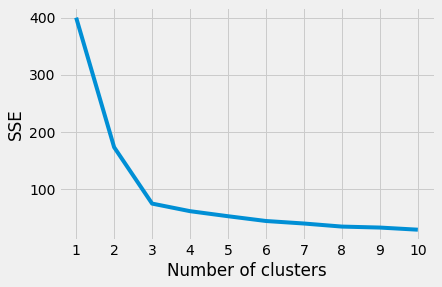

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

In [42]:
kl = KneeLocator(range(1,11), sse, curve= "convex", direction="decreasing")
kl.elbow

3

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters.
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.
The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

In [45]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficien

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

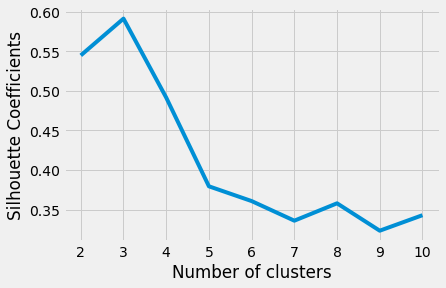

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()

Evaluating Clustering Performance Using Advanced Techniques

The elbow method and silhouette coefficient evaluate clustering performance without the use of ground truth labels. Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.